In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

path = './Documents/Kaggle/Titanic/data/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

data = pd.concat([train,test], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Creating columns Surname and Title

In [32]:
data['Surname'] = data.Name.str.extract('(.*),', expand=False)
data['Title'] = data.Name.str.extract(' ([A-Z][a-z]+)\.', expand=False).replace(
    {'Dona': 'Rare Title', 'Lady': 'Rare Title', 'Countess': 'Rare Title', 'Capt': 'Rare Title',
     'Col': 'Rare Title', 'Don': 'Rare Title',
     'Dr': 'Rare Title', 'Major': 'Rare Title', 'Rev': 'Rare Title', 'Sir': 'Rare Title', 'Jonkheer': 'Rare Title',
     'Mlle': 'Miss','Ms':'Miss','Mme':'Mrs'})


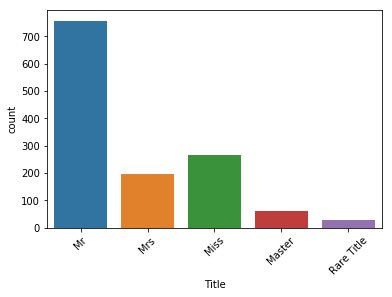

In [33]:
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [34]:
data.Surname.head(4)

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
Name: Surname, dtype: object

## Do families sink or swim together?

In [35]:
data['FamilySize'] = data.Parch + data.SibSp + 1

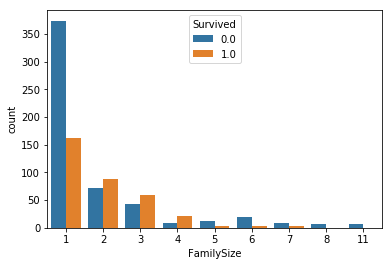

In [36]:
sns.countplot(x='FamilySize', hue='Survived', data=data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Surname        891 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
FSize          876 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 118.3+ KB
None


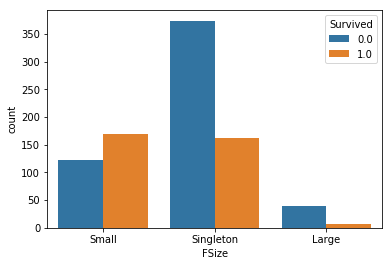

In [37]:
# Discretize family size

def getFSize(val):
    if val ==1:
        return 'Singleton'
    elif val > 1 and val < 5:
        return 'Small'
    elif val > 5:
        return 'Large'
data['FSize'] = data.FamilySize.apply(lambda x: getFSize(x))
print(data[~data['Survived'].isnull()].info())
sns.countplot(x='FSize',hue='Survived', data=data[~data['Survived'].isnull()])

## Passenger Cabin

In [38]:
data['Deck'] = data.Cabin.str.extract('^([A-Z])', expand=False)

In [39]:
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Braund,Mr,2,Small,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Cumings,Mrs,2,Small,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Heikkinen,Miss,1,Singleton,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Futrelle,Mrs,2,Small,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Allen,Mr,1,Singleton,NaN


## Missing Data

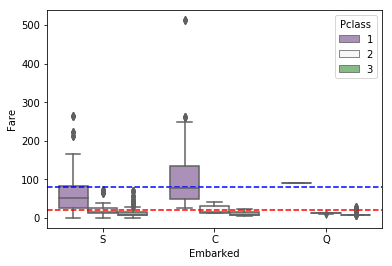

In [40]:
# Embarked
sns.boxplot(x='Embarked',y='Fare', hue='Pclass', data=data,palette="PRGn" );
plt.axhline(y=20, xmin=0,color = 'r',ls='--')
plt.axhline(y=80, xmin=0,color = 'b',ls='--')

In [41]:
data[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Icard,Miss,1,Singleton,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Stone,Mrs,1,Singleton,B


Voilà! The median fare for a first class passenger departing from Charbourg (‘C’) coincides nicely with the $80 paid by our embarkment-deficient passengers. I think we can safely replace the NA values with ‘C’.

In [42]:
data['Embarked'].fillna('C',inplace=True);
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Surname        1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
FSize          1287 non-null object
Deck           295 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 224.1+ KB


In [43]:
data[data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Storey,Mr,1,Singleton,NaN


8.05


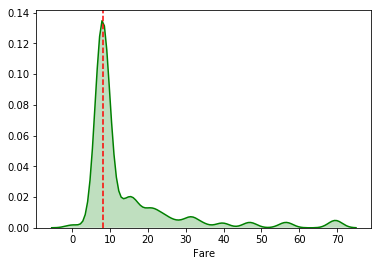

In [65]:
sns.distplot(a=data[(~data['Fare'].isnull()) & (data['Pclass']==3) & (data['Embarked']=='S')].Fare,hist=False, color="g",kde_kws={"shade": True});
plt.axvline(x=data[(~data['Fare'].isnull()) & (data['Pclass']==3) & (data['Embarked']=='S')].Fare.median(), color = 'r', ls='--');
print(data[(~data['Fare'].isnull()) & (data['Pclass']==3) & (data['Embarked']=='S')].Fare.median())
data.Fare.fillna(8.05, inplace=True)

## Predictive imputation

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Surname        1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
FSize          1287 non-null object
Deck           295 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 224.1+ KB


Finally, as we noted earlier, there are quite a few missing Age values in our data. We are going to get a bit more fancy in imputing missing age values. Why? Because we can. We will create a model predicting ages based on other variables.

In [69]:
from fancyimpute import KNN

ModuleNotFoundError: No module named 'fancyimpute'